# Group 4 Project 2

# Time Series Analysis with Prophet

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import requests
import os
import time 
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [2]:
# Install the required libraries
!pip install prophet
!pip install matplotlib basemap basemap-data-hires

## AQI_Max Forecast

In [4]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

new_df = pd.read_csv(
    "Resources/consolidated_seven_ny_counties_filled.csv",
    index_col='date_local',
    low_memory=False,
    parse_dates=True)

#Isolate future_new_df to two columns for Prophet model
future_new_df = new_df[["aqi_max"]] 

# Review the first and last five rows of the DataFrame
display(future_new_df.head())
display(future_new_df.tail())

,aqi_max
date_local,
2013-01-01,52.0
2013-01-02,60.0
2013-01-03,59.0
2013-01-04,64.5
2013-01-05,41.5


,aqi_max
date_local,
2024-03-27,28.083333
2024-03-28,31.250000
2024-03-29,41.500000
2024-03-30,43.333333
2024-03-31,44.000000


In [4]:
# Reset the index so that we recode the columns for Prophet
future_new_df = future_new_df.reset_index()
future_new_df.head()

,date_local,aqi_max
0,2013-01-01,52.0
1,2013-01-02,60.0
2,2013-01-03,59.0
3,2013-01-04,64.5
4,2013-01-05,41.5


In [5]:
# Label the columns ds and y so that the syntax is recognized by Prophet
future_new_df.columns = ['ds', 'y']
future_new_df.head()

,ds,y
0,2013-01-01,52.0
1,2013-01-02,60.0
2,2013-01-03,59.0
3,2013-01-04,64.5
4,2013-01-05,41.5


In [57]:
# Call the Prophet function, store as an object
m = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode="additive",
    seasonality_prior_scale=0.5,
    holidays_prior_scale=5.0,
    changepoint_prior_scale=0.05,
    uncertainty_samples=1000)

m

In [58]:
# Fit the Prophet model to our dataframe
m.fit(future_new_df)

17:01:36 - cmdstanpy - INFO - Chain [1] start processing
17:01:44 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 10 years
future = m.make_future_dataframe(periods=5, freq='Y')

# View the first and last ten rows of the predictions
display(future.head(10))
display(future.tail(10))

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
5,2013-01-06
6,2013-01-07
7,2013-01-08
8,2013-01-09
9,2013-01-10


,ds
4104,2024-03-28
4105,2024-03-29
4106,2024-03-30
4107,2024-03-31
4108,2024-04-01
4109,2024-12-31
4110,2025-12-31
4111,2026-12-31
4112,2027-12-31
4113,2028-12-31


In [60]:
# Make a forecast based on the future DataFrame
forecast = m.predict(future)

# Review the first five rows of the forecast DataFrame
display(forecast.head())
display(forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,46.852547,34.714369,73.847801,46.852547,46.852547,7.731271,7.731271,7.731271,7.731271,7.731271,7.731271,0.0,0.0,0.0,54.583817
1,2013-01-02,46.834617,35.491417,73.902592,46.834617,46.834617,7.807734,7.807734,7.807734,7.807734,7.807734,7.807734,0.0,0.0,0.0,54.642351
2,2013-01-03,46.816688,37.918820,75.390675,46.816688,46.816688,7.871438,7.871438,7.871438,7.871438,7.871438,7.871438,0.0,0.0,0.0,54.688126
3,2013-01-04,46.798759,36.713337,73.557014,46.798759,46.798759,7.923290,7.923290,7.923290,7.923290,7.923290,7.923290,0.0,0.0,0.0,54.722049
4,2013-01-05,46.780830,36.214252,74.025563,46.780830,46.780830,7.964097,7.964097,7.964097,7.964097,7.964097,7.964097,0.0,0.0,0.0,54.744927


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4109,2024-12-31,39.254726,25.978065,66.934841,36.651663,42.092033,7.641070,7.641070,7.641070,7.641070,7.641070,7.641070,0.0,0.0,0.0,46.895796
4110,2025-12-31,37.879098,25.730607,65.942637,29.493000,46.996468,7.616255,7.616255,7.616255,7.616255,7.616255,7.616255,0.0,0.0,0.0,45.495353
4111,2026-12-31,36.503470,19.258252,70.148330,20.542376,53.513388,7.590500,7.590500,7.590500,7.590500,7.590500,7.590500,0.0,0.0,0.0,44.093971
4112,2027-12-31,35.127843,13.242003,76.883240,10.318762,61.489165,7.563791,7.563791,7.563791,7.563791,7.563791,7.563791,0.0,0.0,0.0,42.691634
4113,2028-12-31,33.748447,2.676540,82.908572,0.792764,70.679677,7.641070,7.641070,7.641070,7.641070,7.641070,7.641070,0.0,0.0,0.0,41.389517


C:\Users\Chearine\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Chearine\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


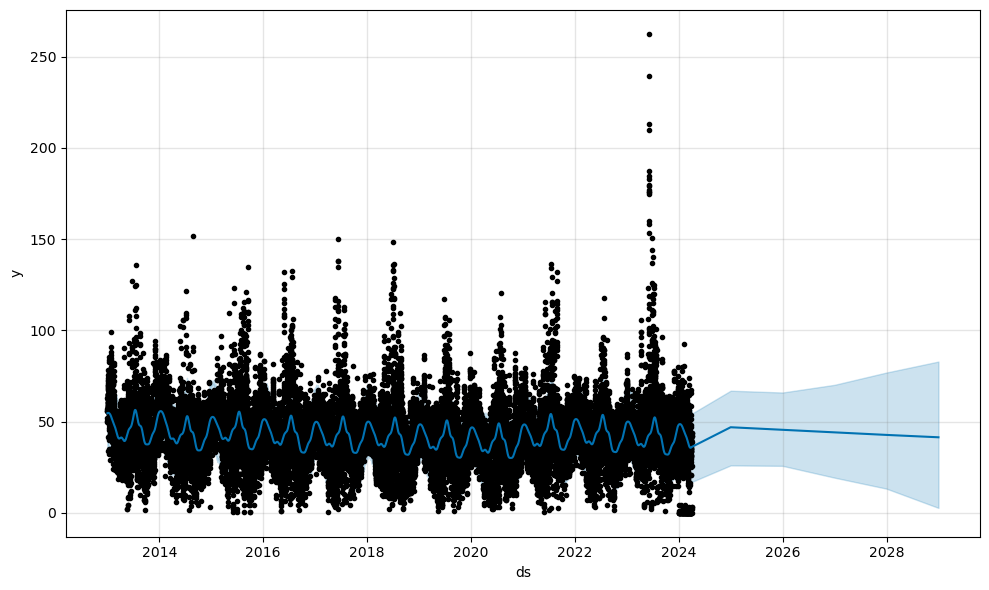

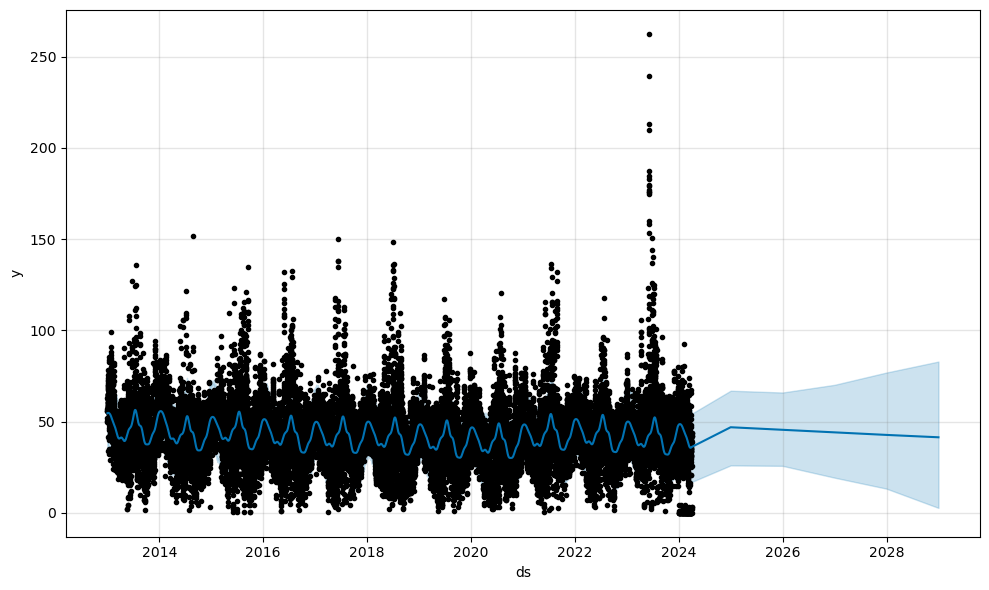

In [61]:
# Plot the Prophet predictions for the next ten years of AQI
m.plot(forecast)

C:\Users\Chearine\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Chearine\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Chearine\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. 

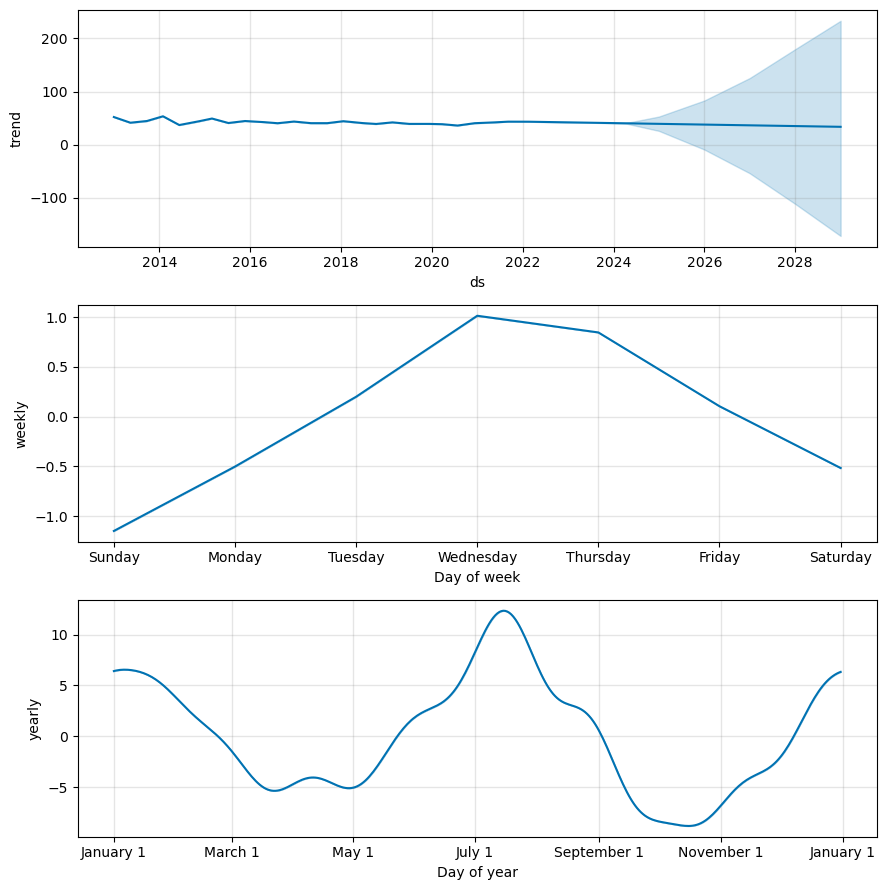

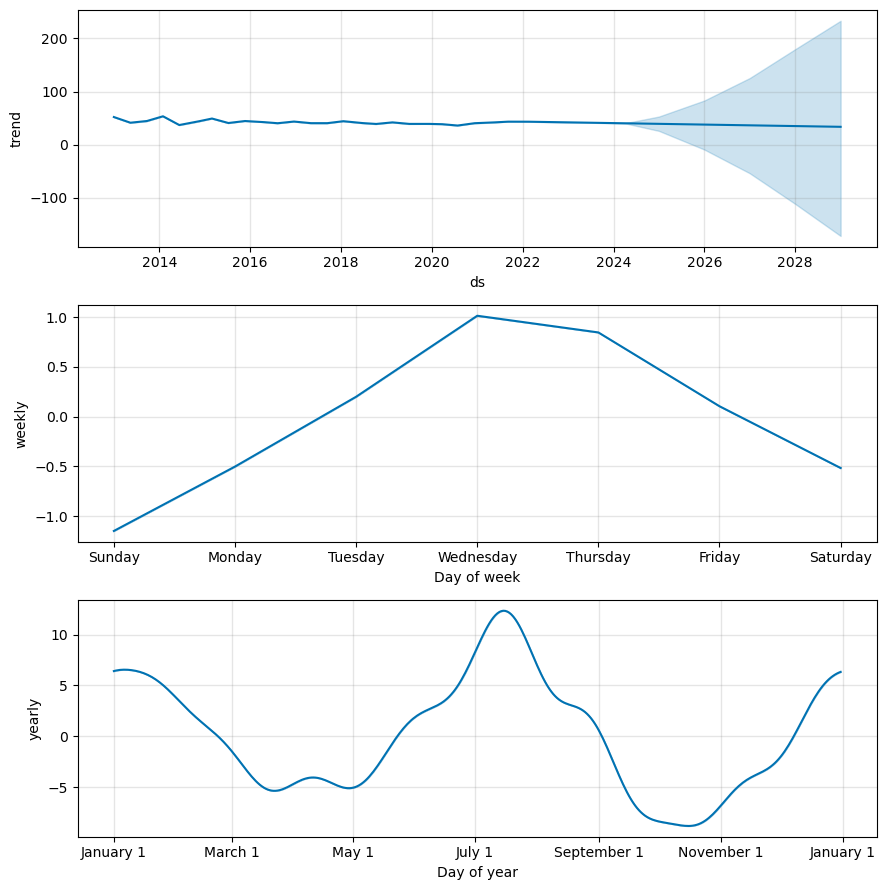

In [11]:
m.plot_components(forecast)

## Ozone Forecast

In [7]:
#Isolate future_new_df to two columns for Prophet model
future_ozone_df = new_df[["aqi_44201"]]
future_ozone_df = future_ozone_df.sort_index()
future_ozone_trimmed_df = future_ozone_df.loc['2016-01-01':'2020-01-01']
# Review the first and last five rows of the DataFrame
display(future_ozone_trimmed_df.head())
display(future_ozone_trimmed_df.tail())

,aqi_44201
date_local,
2016-01-01,43.75
2016-01-01,42.25
2016-01-01,23.00
2016-01-01,24.50
2016-01-01,42.25


,aqi_44201
date_local,
2020-01-01,42.25
2020-01-01,22.00
2020-01-01,42.25
2020-01-01,20.25
2020-01-01,43.75


In [8]:
# Reset the index so that we recode the columns for Prophet
future_ozone_trimmed_df = future_ozone_trimmed_df.reset_index()
future_ozone_trimmed_df.head()

,date_local,aqi_44201
0,2016-01-01,43.75
1,2016-01-01,42.25
2,2016-01-01,23.00
3,2016-01-01,24.50
4,2016-01-01,42.25


In [9]:
# Label the columns ds and y so that the syntax is recognized by Prophet
future_ozone_trimmed_df.columns = ['ds', 'y']
future_ozone_trimmed_df.head()

,ds,y
0,2016-01-01,43.75
1,2016-01-01,42.25
2,2016-01-01,23.00
3,2016-01-01,24.50
4,2016-01-01,42.25


In [17]:
# Call the Prophet function, store as an object
m_ozone = Prophet(yearly_seasonality = True)

m_ozone

In [18]:
# Fit the Prophet model to our dataframe
m_ozone.fit(future_ozone_trimmed_df)

14:48:22 - cmdstanpy - INFO - Chain [1] start processing
14:48:23 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 10 years
future_ozone = m_ozone.make_future_dataframe(periods=5, freq='Y')

# View the first and last ten rows of the predictions
display(future_ozone.head(10))
display(future_ozone.tail(10))

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
5,2016-01-06
6,2016-01-07
7,2016-01-08
8,2016-01-09
9,2016-01-10


,ds
1457,2019-12-28
1458,2019-12-29
1459,2019-12-30
1460,2019-12-31
1461,2020-01-01
1462,2020-12-31
1463,2021-12-31
1464,2022-12-31
1465,2023-12-31
1466,2024-12-31


In [20]:
# Make a forecast based on the future DataFrame
ozone_forecast = m_ozone.predict(future_ozone)

# Review the first five rows of the forecast DataFrame
display(ozone_forecast.head())
display(ozone_forecast.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,37.665664,16.006660,45.133522,37.665664,37.665664,-6.932989,-6.932989,-6.932989,-0.220191,-0.220191,-0.220191,-6.712798,-6.712798,-6.712798,0.0,0.0,0.0,30.732674
1,2016-01-02,37.669952,16.266304,45.689186,37.669952,37.669952,-6.424953,-6.424953,-6.424953,0.274220,0.274220,0.274220,-6.699173,-6.699173,-6.699173,0.0,0.0,0.0,31.244999
2,2016-01-03,37.674240,16.968764,45.737172,37.674240,37.674240,-6.397081,-6.397081,-6.397081,0.292950,0.292950,0.292950,-6.690030,-6.690030,-6.690030,0.0,0.0,0.0,31.277160
3,2016-01-04,37.678528,16.331092,45.839632,37.678528,37.678528,-6.847414,-6.847414,-6.847414,-0.162426,-0.162426,-0.162426,-6.684987,-6.684987,-6.684987,0.0,0.0,0.0,30.831115
4,2016-01-05,37.682817,16.467918,44.476110,37.682817,37.682817,-7.095551,-7.095551,-7.095551,-0.411992,-0.411992,-0.411992,-6.683559,-6.683559,-6.683559,0.0,0.0,0.0,30.587266


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1462,2020-12-31,40.099673,18.375735,48.028950,39.859910,40.336973,-6.484742,-6.484742,-6.484742,0.232197,0.232197,0.232197,-6.716939,-6.716939,-6.716939,0.0,0.0,0.0,33.614931
1463,2021-12-31,41.136983,19.637098,48.479789,40.362818,41.912559,-6.941573,-6.941573,-6.941573,-0.220191,-0.220191,-0.220191,-6.721382,-6.721382,-6.721382,0.0,0.0,0.0,34.195410
1464,2022-12-31,42.174293,19.197679,49.922112,40.672190,43.625371,-6.451907,-6.451907,-6.451907,0.274220,0.274220,0.274220,-6.726127,-6.726127,-6.726127,0.0,0.0,0.0,35.722385
1465,2023-12-31,43.211602,22.121699,51.460564,40.905385,45.394166,-6.438228,-6.438228,-6.438228,0.292950,0.292950,0.292950,-6.731178,-6.731178,-6.731178,0.0,0.0,0.0,36.773374
1466,2024-12-31,44.251754,21.564566,52.261275,40.970327,47.266521,-7.128931,-7.128931,-7.128931,-0.411992,-0.411992,-0.411992,-6.716939,-6.716939,-6.716939,0.0,0.0,0.0,37.122823


C:\Users\Chearine\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Chearine\anaconda3\envs\dev\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


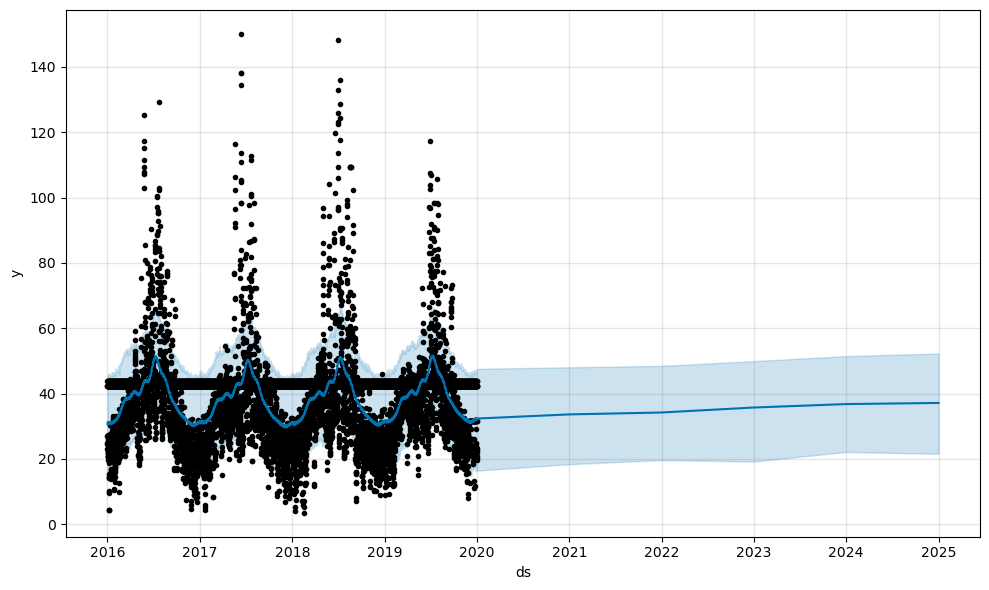

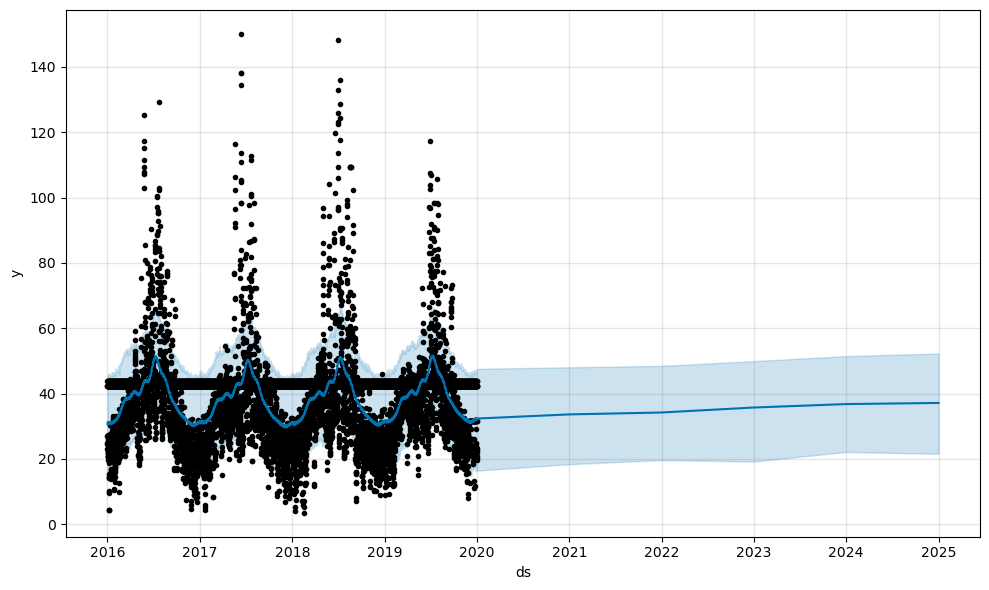

In [21]:
# Plot the Prophet predictions for the next ten years of AQI
m_ozone.plot(ozone_forecast)

# Plotting to see trends and relationships with matplotlib

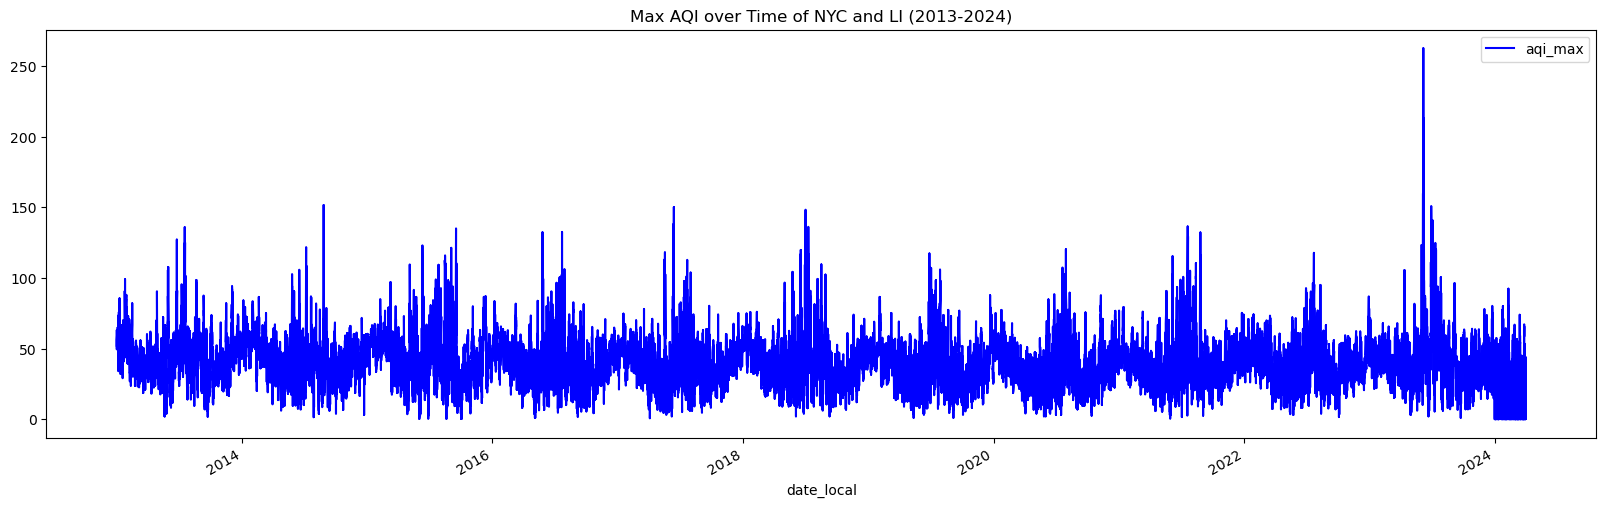

In [22]:
# Plotting max AQI over time
new_df.plot( y = 'aqi_max', color = ['blue'], title = 'Max AQI over Time of NYC and LI (2013-2024)')
plt.gcf().set_size_inches(20, 6)
plt.show()

## AQI (Air Quality Index) shown on a map

In [23]:
#Prepare data frame for map plotting
grouped_df = new_df.groupby('county')[['aqi_max','latitude','longitude']].mean().reset_index()
new_map_df = grouped_df.dropna()
new_map_df

,county,aqi_max,latitude,longitude
0,Bronx,45.805213,40.834185,-73.916964
1,Kings,38.212786,40.687278,-73.940228
2,Nassau,32.471536,40.743160,-73.585490
3,New York,45.117294,40.844600,-73.937805
4,Queens,46.481355,40.734373,-73.846921
5,Richmond,44.435882,40.583921,-74.194093
6,Suffolk,43.207116,40.827990,-73.057540


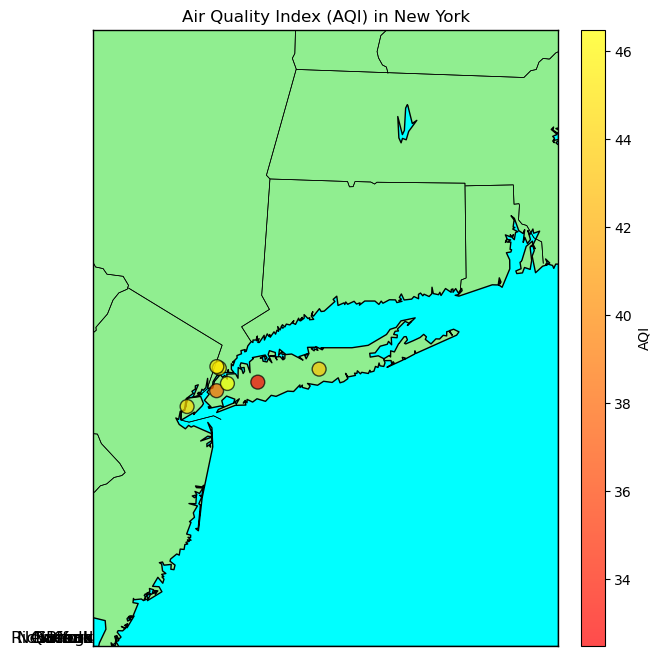

In [26]:
# Create a map centered on New York City region showing mean AQI for 2013-2023

fig, ax = plt.subplots(figsize=(10, 8))


map = Basemap(projection='merc', llcrnrlat=39, urcrnrlat=43,
                llcrnrlon=-75, urcrnrlon=-71, lat_ts=41, resolution='i')

# Draw map details
map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='lightgreen', lake_color='aqua')

# Convert latitude and longitude to map projection coordinates for New York
x, y = map(new_map_df['longitude'].values, new_map_df['latitude'].values)

# Plot AQI values with a scatter plot
sc = map.scatter(x, y, c=new_map_df['aqi_max'], s=100, cmap='autumn', alpha=0.7, edgecolors='k', zorder=2)

# Add a colorbar
cbar = map.colorbar(sc, location='right', pad='5%')
cbar.set_label('AQI')

# Add city labels
for county, lon, lat in zip(new_map_df['county'], new_map_df['longitude'], new_map_df['latitude']):
    plt.text(lon, lat, county, fontsize=12, ha='right', va='bottom', transform=ax.transData)

plt.title('Air Quality Index (AQI) in New York')
plt.savefig('ny_aqi_map.png')
plt.show()

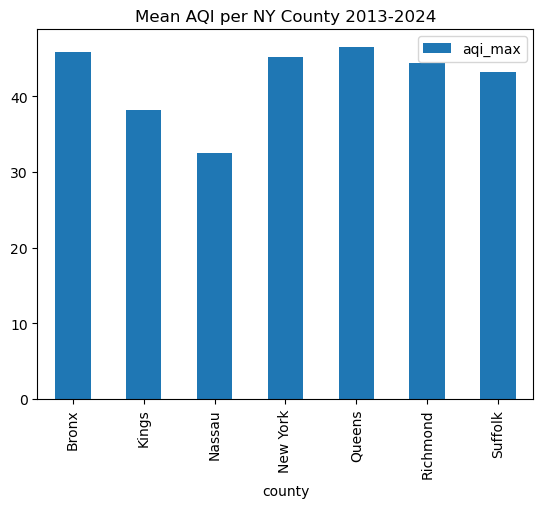

In [32]:
new_map_df.plot.bar(x= 'county', y= 'aqi_max', title = 'Mean AQI per NY County 2013-2024')
plt.savefig('aqi_per_county.png')
plt.show()